# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
OPTIMIZER = ['sgd', 'rmsprop' ,'adam']
EPOCHS = 50
BATCH_SIZE = 256

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for op in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f, OP = %s" % (lr, op))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=lr)
        if (op == 'rmsprop'):
            optimizer = keras.optimizers.RMSprop(lr=lr)
        elif (op == 'adam'):
            optimizer = keras.optimizers.Adam(lr=lr)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s-op-%s" % (str(lr), op)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000, OP = sgd
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.4444 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 6s 118us/step - loss: 14.4447 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 104us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [=======

50000/50000 [==============================] - 4s 78us/step - loss: 2.0576 - acc: 0.2565 - val_loss: 1.9457 - val_acc: 0.3012
Epoch 2/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8935 - acc: 0.3303 - val_loss: 1.8886 - val_acc: 0.3205
Epoch 3/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8298 - acc: 0.3551 - val_loss: 1.8246 - val_acc: 0.3545
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7819 - acc: 0.3728 - val_loss: 1.7824 - val_acc: 0.3647
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7421 - acc: 0.3878 - val_loss: 1.7644 - val_acc: 0.3771
Epoch 6/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.7108 - acc: 0.3990 - val_loss: 1.7030 - val_acc: 0.3966
Epoch 7/50
50000/50000 [==============================] - 4s 76us/step - loss: 1.6852 - acc: 0.4073 - val_loss: 1.6687 - val_acc: 0.4140
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 89us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 91us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============

Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 102us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50

50000/50000 [==============================] - 4s 77us/step - loss: 2.1129 - acc: 0.2475 - val_loss: 2.0909 - val_acc: 0.2580
Epoch 4/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.0745 - acc: 0.2630 - val_loss: 2.0571 - val_acc: 0.2707
Epoch 5/50
50000/50000 [==============================] - 4s 76us/step - loss: 2.0433 - acc: 0.2768 - val_loss: 2.0290 - val_acc: 0.2820
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 2.0170 - acc: 0.2870 - val_loss: 2.0049 - val_acc: 0.2928
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.9944 - acc: 0.2965 - val_loss: 1.9843 - val_acc: 0.2946
Epoch 8/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.9747 - acc: 0.3041 - val_loss: 1.9655 - val_acc: 0.3070
Epoch 9/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9575 - acc: 0.3103 - val_loss: 1.9495 - val_acc: 0.3133
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 9s 178us/step - loss: 1.7172 - acc: 0.3847 - val_loss: 1.6918 - val_acc: 0.4077
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.6572 - acc: 0.4074 - val_loss: 1.7165 - val_acc: 0.3803
Epoch 6/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6129 - acc: 0.4240 - val_loss: 1.6515 - val_acc: 0.3998
Epoch 7/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.5676 - acc: 0.4394 - val_loss: 1.7878 - val_acc: 0.3736
Epoch 8/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5360 - acc: 0.4505 - val_loss: 1.6006 - val_acc: 0.4246
Epoch 9/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5057 - acc: 0.4634 - val_loss: 1.7067 - val_acc: 0.3917
Epoch 10/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4749 - acc: 0.4726 - val_loss: 1.6166 - val_acc: 0.4237
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 8s 159us/step - loss: 1.5115 - acc: 0.4601 - val_loss: 1.5571 - val_acc: 0.4394
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4703 - acc: 0.4756 - val_loss: 1.4597 - val_acc: 0.4835
Epoch 7/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4411 - acc: 0.4873 - val_loss: 1.4598 - val_acc: 0.4856
Epoch 8/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.4001 - acc: 0.5023 - val_loss: 1.4754 - val_acc: 0.4818
Epoch 9/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3745 - acc: 0.5096 - val_loss: 1.4599 - val_acc: 0.4869
Epoch 10/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3544 - acc: 0.5174 - val_loss: 1.4869 - val_acc: 0.4657
Epoch 11/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.3224 - acc: 0.5292 - val_loss: 1.5377 - val_acc: 0.4567
Epoch 12/50
50000/50000 [=================

50000/50000 [==============================] - 7s 138us/step - loss: 2.2597 - acc: 0.1593 - val_loss: 2.2550 - val_acc: 0.1647
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2508 - acc: 0.1658 - val_loss: 2.2465 - val_acc: 0.1724
Epoch 8/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.2423 - acc: 0.1733 - val_loss: 2.2384 - val_acc: 0.1780
Epoch 9/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.2342 - acc: 0.1805 - val_loss: 2.2306 - val_acc: 0.1855
Epoch 10/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.2266 - acc: 0.1872 - val_loss: 2.2231 - val_acc: 0.1942
Epoch 11/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.2192 - acc: 0.1939 - val_loss: 2.2160 - val_acc: 0.1979
Epoch 12/50
50000/50000 [==============================] - 7s 142us/step - loss: 2.2122 - acc: 0.1992 - val_loss: 2.2092 - val_acc: 0.2045
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 9s 189us/step - loss: 1.5423 - acc: 0.4534 - val_loss: 1.6137 - val_acc: 0.4205
Epoch 8/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.5110 - acc: 0.4643 - val_loss: 1.5918 - val_acc: 0.4316
Epoch 9/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.4872 - acc: 0.4752 - val_loss: 1.5099 - val_acc: 0.4620
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4621 - acc: 0.4862 - val_loss: 1.5389 - val_acc: 0.4579
Epoch 11/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.4398 - acc: 0.4915 - val_loss: 1.4973 - val_acc: 0.4678
Epoch 12/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.4200 - acc: 0.4982 - val_loss: 1.4668 - val_acc: 0.4795
Epoch 13/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.3989 - acc: 0.5060 - val_loss: 1.4360 - val_acc: 0.4900
Epoch 14/50
50000/50000 [==============

50000/50000 [==============================] - 10s 193us/step - loss: 1.4397 - acc: 0.4953 - val_loss: 1.4838 - val_acc: 0.4734
Epoch 9/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.4168 - acc: 0.5020 - val_loss: 1.4614 - val_acc: 0.4816
Epoch 10/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3915 - acc: 0.5128 - val_loss: 1.4377 - val_acc: 0.4925
Epoch 11/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3712 - acc: 0.5182 - val_loss: 1.4300 - val_acc: 0.4936
Epoch 12/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3496 - acc: 0.5251 - val_loss: 1.3976 - val_acc: 0.5041
Epoch 13/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.3348 - acc: 0.5330 - val_loss: 1.4057 - val_acc: 0.5032
Epoch 14/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3054 - acc: 0.5414 - val_loss: 1.3935 - val_acc: 0.5019
Epoch 15/50
50000/50000 [==============

50000/50000 [==============================] - 7s 134us/step - loss: 2.3055 - acc: 0.1113 - val_loss: 2.3044 - val_acc: 0.1099
Epoch 10/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.3033 - acc: 0.1131 - val_loss: 2.3022 - val_acc: 0.1111
Epoch 11/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.3012 - acc: 0.1146 - val_loss: 2.3001 - val_acc: 0.1127
Epoch 12/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2993 - acc: 0.1161 - val_loss: 2.2982 - val_acc: 0.1161
Epoch 13/50
50000/50000 [==============================] - 7s 148us/step - loss: 2.2975 - acc: 0.1178 - val_loss: 2.2964 - val_acc: 0.1175
Epoch 14/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.2958 - acc: 0.1202 - val_loss: 2.2947 - val_acc: 0.1184
Epoch 15/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.2942 - acc: 0.1223 - val_loss: 2.2931 - val_acc: 0.1220
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 8s 154us/step - loss: 1.6958 - acc: 0.4103 - val_loss: 1.7043 - val_acc: 0.4065
Epoch 11/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.6805 - acc: 0.4168 - val_loss: 1.6936 - val_acc: 0.4121
Epoch 12/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6670 - acc: 0.4221 - val_loss: 1.6736 - val_acc: 0.4193
Epoch 13/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.6550 - acc: 0.4247 - val_loss: 1.6674 - val_acc: 0.4156
Epoch 14/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6432 - acc: 0.4307 - val_loss: 1.6542 - val_acc: 0.4198
Epoch 15/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.6321 - acc: 0.4343 - val_loss: 1.6550 - val_acc: 0.4252
Epoch 16/50
50000/50000 [==============================] - 7s 149us/step - loss: 1.6216 - acc: 0.4372 - val_loss: 1.6326 - val_acc: 0.4300
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 8s 159us/step - loss: 1.6440 - acc: 0.4275 - val_loss: 1.6424 - val_acc: 0.4248
Epoch 12/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.6290 - acc: 0.4334 - val_loss: 1.6405 - val_acc: 0.4255
Epoch 13/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6171 - acc: 0.4372 - val_loss: 1.6205 - val_acc: 0.4338
Epoch 14/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.6038 - acc: 0.4423 - val_loss: 1.6087 - val_acc: 0.4361
Epoch 15/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.5923 - acc: 0.4460 - val_loss: 1.6004 - val_acc: 0.4410
Epoch 16/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5804 - acc: 0.4505 - val_loss: 1.5916 - val_acc: 0.4420
Epoch 17/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.5707 - acc: 0.4526 - val_loss: 1.5824 - val_acc: 0.4468
Epoch 18/50
50000/50000 [============

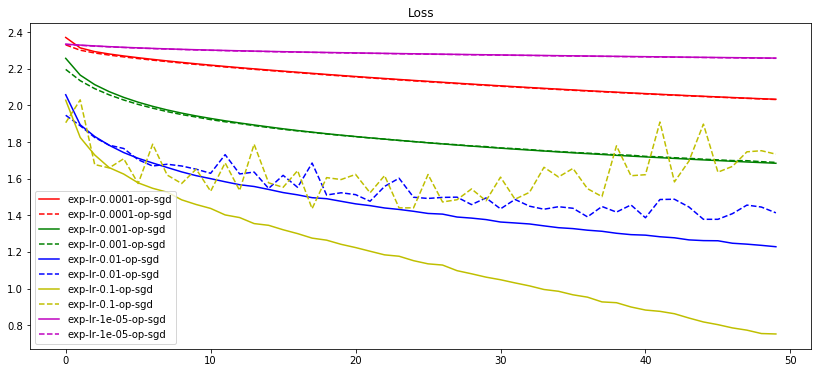

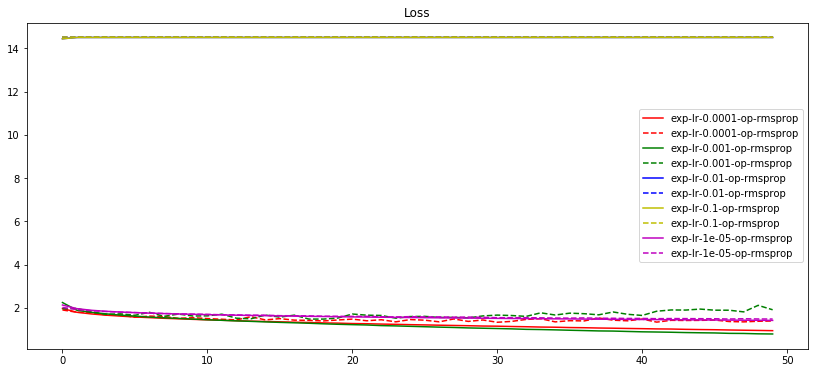

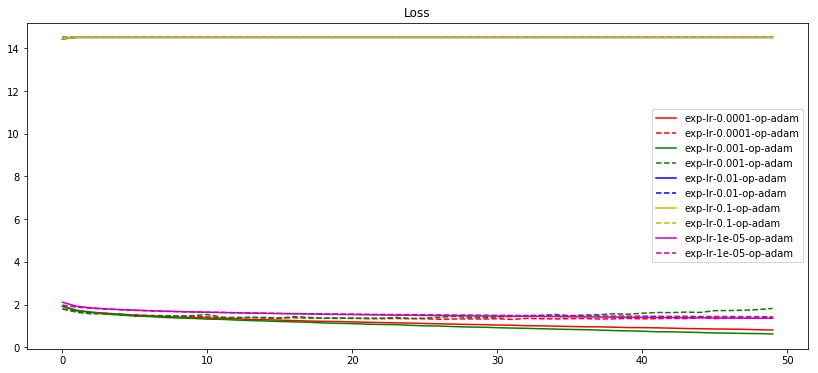

In [25]:
import matplotlib.pyplot as plt
#from matplotlib.pyplot import cm
#import numpy as np
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
#color_bar = cm.rainbow(np.linspace(0, 1, 15))

keys = list(sorted(results.keys()))

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[0] in key]):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[1] in key]):    
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[2] in key]):    
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

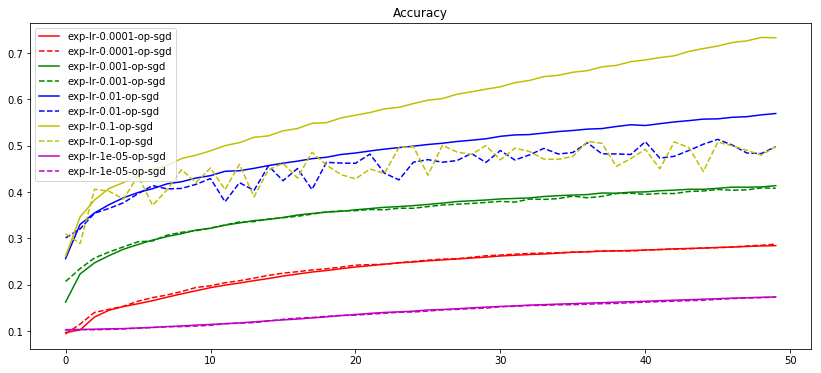

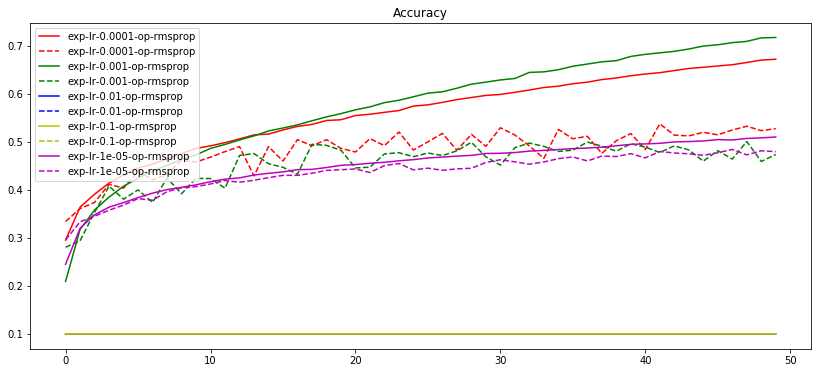

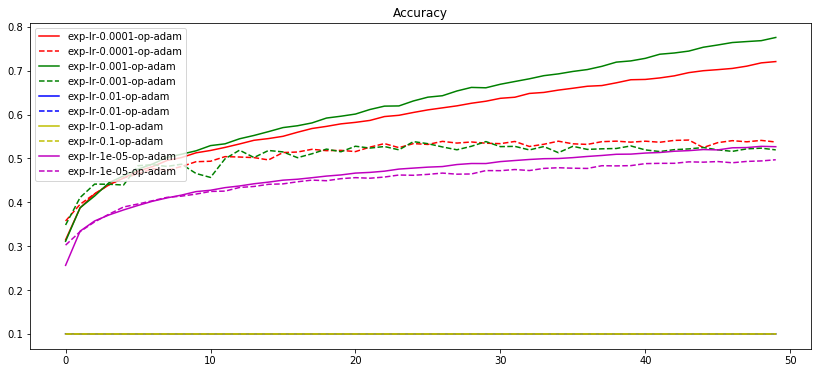

In [26]:
plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[0] in key]):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[1] in key]):    
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(14,6))
for i, cond in enumerate([key for key in keys if OPTIMIZER[2] in key]):    
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()